# 2021-10-06

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/KLUE Summarization/

/content/drive/Shareddrives/KLUE Summarization


In [ ]:
!ls

 모델링		 '문서요약 텍스트'   models		'Preprocessed Data'
'도서자료 요약'  'klue crawling'     news_summary2.pkl	'문서요약 텍스트_unzip'


In [ ]:
import json
import pandas as pd

# json을 dataframe으로 변환
def read_jsonl(path):
  DATA_DIR = "문서요약 텍스트_unzip"
  with open(DATA_DIR + path , 'r') as json_file:
      json_list = list(json_file)

  trains = []

  for json_str in json_list:
      line = json.loads(json_str)
      trains.append(line)
  df = pd.DataFrame(trains)
  return df

train_df = read_jsonl('/1.Training/신문기사_1.train.jsonl/train.jsonl')
val_df = read_jsonl('/2.Validation/신문기사_1.vaild.jsonl/vaild.jsonl')
train_df.head()

,media,id,article_original,abstractive,extractive
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]"
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]"
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]"
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]"
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]"


In [ ]:
# join으로 str로 바꿔줘야할듯
for i,info in enumerate(train_df['article_original'][1]):
  print('line {} : {}'.format(i,info))

line 0 : 서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 우수의정대상을 받았다.
line 1 : 가충순 의원과 이수의 의원은 16일 팔봉면 폰타나 리조트에서 열린 한국지역신문협회 하계 워크샵에서 지역사회 발전을 위해 활발한 의정활동을 펼친 공로를 인정받아 우수의정대상을 수상했다.
line 2 : 지난해 6월 제7회 전국동시지방선거를 통해 등원한 두 의원은 산업건설위원회에서 열정적인 의정활동을 펼치고 있다.
line 3 : 가충순 의원은 5분발언, 행정사무감사, 시정질문을 통해 자동차 연비테스트 연구시설 유치, 천수만 염해피해 재발 방지, 서산시 대표 농산물 육성 등 지역의 크고 작은 문제를 개선하기 위해 노력하고 있다.
line 4 : 이수의 의원은 지난 행정사무감사에서 대산공단 기업 임원을 참고인으로 출석시켜 지역인재채용 및 관내업체·자재 활용을 확대할 것을 제안하며 기존 행정사무감사의 틀을 깨는 등 다양한 의정활동을 펼쳐나가고 있다.
line 5 : 가충순 의원은 "시의원이라면 마땅히 해야할 일을 한 것 뿐인데 상까지 주시니 몸 둘 바를 모르겠다"며 "항상 초심을 잊지 않고 지역 발전을 위해 최선을 다하겠다"고 소감을 밝혔다.
line 6 : 이수의 의원은 "믿고 뽑아주신 주민들을 위해 당연히 해야할 일을 했을 뿐인데 상까지 받게 돼 영광"이라며 "시민들이 자부심을 느낄 수 있는 지역사회를 만들어 나가기 위해 앞으로도 최선을 다 하겠다"고 말했다.


In [ ]:
def articles_to_str(articles_list):
  return ' '.join(articles_list)

In [ ]:
train_df['article_to_str']=train_df['article_original'].apply(articles_to_str)

In [ ]:
train_df.head()

,media,id,article_original,abstractive,extractive,article_to_str
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]",지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성...
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]",서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 우...
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]",지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대장...
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]",서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 2...
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]",미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민단...


In [ ]:
print(train_df['article_to_str'][0])
print(type(train_df['article_to_str'][0]))
print(type(train_df['abstractive'][0]))


지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다. ‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다. ■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다. ■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년(37.8명) 대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다. ■자살률 5

In [ ]:
df=train_df[['article_to_str', 'abstractive']][:1000]
print(len(train_df))
print(len(df)) 
df.head()

260697
1000


,article_to_str,abstractive
0,지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...
1,서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 우...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...
2,지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대장...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...
3,서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 2...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...
4,미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민단...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...


# Pretrained model Usages : Fine-tuning 전

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.0 MB/s 
     |████████████████████████████████| 895 kB 33.5 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 636 kB 41.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# hugging face의 Transformers 호출
from transformers import BertTokenizerFast, EncoderDecoderModel

# BertTokenizerFast: 텍스트 -> 토큰
# EncoderDecoderModel: 인코더-디코더 학습모델

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('kykim/bertshared-kor-base')   # kykim 사전학습

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.14k [00:00<?, ?B/s]

In [ ]:
ex_in=train_df['article_original'][0]
#ex_out=train_df['abstractive'][0]
ex_in=' '.join(ex_in)

In [ ]:
inputs=tokenizer.encode_plus(ex_in,return_tensors='pt',truncation=True,padding="max_length")

In [ ]:
#outputs=tokenizer.encode_plus(ex_out,return_tensors='pt',truncation=True,padding="max_length")

In [ ]:
#inputs=tokenizer(ex_in,return_tensors='pt',truncation=True,padding="max_length")

In [ ]:
print(inputs)

{'input_ids': tensor([[    2, 15080, 25524, 19039,  5858, 41843, 31908, 14516,  7653,  8349,
          3408, 29612, 15783, 17133,  8158, 15041, 26052, 15599, 14305, 14115,
         19889,  2016,  7482,  8594,  8289, 30412,  8107, 39394,  8159,  5512,
          8391, 19634,  8211, 27541, 15080, 17133, 31913, 26989, 30822,  8061,
          2027, 16266, 21225, 14017, 15468,  7653, 16156,  2014,  3319, 16156,
         16045, 13975,  3408, 21004,  8238, 20784,  8008, 17765, 17133, 17608,
         25646, 13975, 23783,  8013,  2016,     1, 20844, 36577,  8393, 17133,
          8388,     1,  2010, 19235, 40849, 24591,  4143,  8098, 17133,  8158,
          5099,  2011,  5883, 17397,     1, 27553,     1, 14933, 27621, 22417,
         18697,  2016,     1, 17133,  8158, 16120,  8120, 22675, 14805,  8350,
          2014, 20744, 28726, 20396, 26052, 23927, 23200,     1, 17630, 17133,
         31913,  8101,  8007,     1,  3966, 14256, 15080,  6677, 17133,  8158,
         16543, 21225, 15557,  2022,  

In [ ]:
inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1

In [ ]:
print(len(inputs[0]))

512


## Model 사용법

In [ ]:
#model_gpt2=GPT2LMHeadModel.from_pretrained("kykim/gpt3-kor-small_based_on_gpt2")

In [ ]:
model_bertshared = EncoderDecoderModel.from_pretrained("kykim/bertshared-kor-base")

Downloading:   0%|          | 0.00/562M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


In [ ]:
from os import truncate
# https://colab.research.google.com/github/kiyoungkim1/LMkor/blob/main/notebooks/summarization_with_bertshared.ipynb#scrollTo=atpZXK1ioMDa
# https://github.com/kiyoungkim1/LMkor/blob/main/examples/bertshared_summarization.py

# 요약 클래스 정의
class Summarize():
    def __init__(self, model_name):
        self.tokenizer = BertTokenizerFast.from_pretrained(model_name)   # 토크나이저 객체
        self.model = EncoderDecoderModel.from_pretrained(model_name)   # 인코더디코더 모델 객체
        # self.model=self.model.encoder.resize_token_embeddings(len(self.tokenizer))
        # self.model=self.model.decoder.resize_token_embeddings(len(self.tokenizer))

    def __call__(self, text):
        input_ids = self.tokenizer.encode(text, return_tensors= 'pt',truncation=True,padding="max_length")   # 토큰화

        # input 길이 수정 -> 강의평에 맞게끔
        sentence_length = len(input_ids[0])
        min_length = max(20, int(0.1*sentence_length))   
        max_length = min(128, int(0.3*sentence_length))


        outputs = self.model.generate(
            input_ids,
            min_length=min_length,
            max_length=max_length
        )

        print(self.tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
summarize=Summarize('kykim/bertshared-kor-base')

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


## pretrained model 적용 : training data

In [ ]:
# Training data에 적용했을 때
text=train_df['article_to_str'][0]
print('본문 :',text)
print('------------------------------')
print('요약문 :',end='')
summarize(text)

본문 : 지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다. ‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다. ■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다. ■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년(37.8명) 대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다. ■

## pretrained model 적용 : klue review data

In [ ]:
text='이때까지 경영학과에서 들었던 모든 과목중에 성취감은 가장 높은 과목인 것 같습니다.매번 케이스 분석을 바탕으로 정말 오랜시간동안 토론이 진행되는데, 내용이 많이 유익합니다. 팀플이 까다로운 편이긴 하지만, 모두가 노력한 만큼 교수님께서 점수를 잘 주시는 것 같습니다. 쉽지 않은 과목이지만, 그만큼 얻어가는 것이 많았던 김재욱 교수님의 강의였습니다. 강의 시간이 길고, HBS 케이스 및 과제에 대한 부담이 컸지만, 별도의 시험을 치지 않기 때문에, 시험 기간의 부담이 훨씬 적었습니다. 교수님께서 이제 안식년에 들어가시기 때문에 당분간은 개강되지 않겠지만, 비즈니스 케이스에 대한 분석 방법론, 데이터 계산을 통한 근거 형성, 열정적인 강의 등에 관심있는 학우라면, 추천합니다! 줌 라이브 강의로 진행됨 / 월요일 3시반~6시15분(이지만 더 늦게 끝날 때도 있었어요) / 중간기말 없고, 1~2주에 한번 정도 영문 케이스 읽고 레포트(2장 분량) 제출 / 팀플 레포트+발표 1번 있음. 사실 이 강의를 들으면서 내용도 어렵고 케이스 스터디는 막막해서 힘들 때가 많았습니다. 산 넘어 산이라는 말처럼 매주 더 어려워지더라고요... 마케팅 잘 모르는 내가 이걸 왜 듣겠다고 했을까 후회도 했어요. 그런데 신기한 게 매주 끙끙대면서 레포트를 써서 제출하고 나서 수업을 들으면 신기하게 고민하던 내용들이 다 정리되는 느낌이었어요. 교수님의 설명+학우님들의 의견을 듣다 보면 명쾌하게 이해가 되는 기적... B2B 쪽은 개인적으로 처음 접해봐서 낯설고 어려웠지만 강의가 유익해서 열심히 들었던 것 같아요. 학점이 어떻게 나오더라도 후회 없이 최선을 다하자는 생각이었는데, 결과적으로는 기대 이상으로 학점도 잘 받았습니다. 수업 시간에 발표를 자주 하는 게 중요한 것 같아요. 레포트는 내가 어려우면 다른 사람도 어렵다 라는 생각으로 가능한 만큼 쓰면 (정신건강에) 좋을 것 같습니다ㅎㅎ 이 강의를 들으면서 B2B 마케팅과 더 친숙해졌고 실무적인 관점의 접근을 배운 것 같아요. 관련 분야에 관심 있는 분들께 추천드립니다.'

In [ ]:
print('본문 :',text)
print('------------------------------')
print('요약문 :',end='')
summarize(text)

# Torch Dataset Customizing

In [ ]:
# 필요 라이브러리 호출: torch
import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)
import random

from transformers import GPT2LMHeadModel, GPT2Config
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
class BertSharedDataset(Dataset):

  #def __init__(self, txt_list,tokenizer,model_type="encoder-decoder", max_length=512): # gpt2_type 바꿔야 될듯
  def __init__(self, txt_list, txt_list2, tokenizer,model_type="encoder-decoder", max_length=512):
    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = [] 
    self.decoder_input_ids=[]
    self.decoder_attn_masks = [] 
    
  # 인코딩 
    for txt in txt_list:   # 입력 문장 데이터

      encodings_dict = tokenizer(txt,return_tensors='pt',truncation=True,padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict['input_ids'][0])) 
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask'][0])) 
    
    for txt in txt_list2:   # 요약 문장 데이터
      encodings_dict = tokenizer(txt,return_tensors='pt',truncation=True,padding="max_length")
      self.decoder_input_ids.append(torch.tensor(encodings_dict['input_ids'][0])) 
      self.decoder_attn_masks.append(torch.tensor(encodings_dict['attention_mask'][0])) 

  # data sample 수
  def __len__(self):
    return len(self.input_ids)

  # data sample return
  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx],self.decoder_input_ids[idx],self.decoder_attn_masks[idx]

In [ ]:
df1 = train_df['article_to_str'][:1000]   # 원문
df2 = train_df['abstractive'][:1000]   # 요약

In [ ]:
df1.head()

0    지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성...
1    서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 우...
2    지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대장...
3    서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 2...
4    미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민단...
Name: article_to_str, dtype: object

In [ ]:
df2.head()

0    통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...
1    서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...
2     ‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...
3    서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...
4    미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...
Name: abstractive, dtype: object

In [ ]:
# 전처리한 article 리스트(df)에 대해 파이토치 데이터셋 생성

dataset=BertSharedDataset(df1,df2, tokenizer,max_length=512)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone()

  900 training samples
  100 validation samples


In [ ]:
len(dataset)

1000

In [ ]:
# 토치 데이터 로더
batch_size = 2 # 서버에서 돌리면 다르게 설정해도 될듯
# GPT2 is a large model. Increasing the batch size above 2 has lead to out of memory problems. 
# This can be mitigated by accumulating the gradients but that is out of scope here.

# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Fine-Tuning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import torch
import random
import os
import time
import datetime

In [ ]:
model = EncoderDecoderModel.from_pretrained("kykim/bertshared-kor-base") 

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


In [ ]:
# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up

# embedding 행렬 크기 토큰에 맞게 조정
model.encoder.resize_token_embeddings(len(tokenizer))
model.decoder.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
# some parameters I cooked up that work reasonably well

epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8

# this produces sample output every 100 steps 
# 예로 사용한 데이터셋이 작아서 sample_every : 문장생성을  100 -> 20step 마다로 바꿔봤음!
sample_every = 100

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                )

In [ ]:
len(train_dataloader)

450

In [ ]:
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
# 학습 진행되면서 learning_rate 바뀌면서 학습 빠르게 진행되도록 해줌.

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [ ]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [ ]:
for step, batch in enumerate(train_dataloader):

      print(step, batch)
      
      
      #for i in batch[0][0]:
       # print(tokenizer.convert_ids_to_tokens(i))
      #for i in batch[0][1]:
        #print(tokenizer.convert_ids_to_tokens(i))
      #print('b_encoder_masks : ',batch[1][0])
      #print('b_decoder_masks : ',batch[1][1])


      # print(step,len(batch),'batch[0] :',batch[0],'batch[1] :',batch[1])

0 [tensor([[    2,     1, 15649,  ...,     0,     0,     0],
        [    2, 14023, 19323,  ...,     0,     0,     0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), tensor([[    2, 15649, 34203,  ...,     0,     0,     0],
        [    2, 14023, 19323,  ...,     0,     0,     0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])]
1 [tensor([[    2, 25571, 21980,  ...,     0,     0,     0],
        [    2, 19966, 18695,  ..., 29266,  8267,     3]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), tensor([[    2, 25571, 21980,  ...,     0,     0,     0],
        [    2, 19966, 14328,  ...,     0,     0,     0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])]
2 [tensor([[    2,     1,  2102,  ...,     0,     0,     0],
        [    2, 14149, 19926,  ...,     0,     0,     0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), tensor([[    2,     1, 18199,  ...,     0,     0,  

In [ ]:
print(batch[0])
print(batch[1])
print(batch[2])
print(batch[3])

tensor([[    2, 20064, 14683,  ...,     0,     0,     0],
        [    2, 40061,  5645,  ..., 15616,  8144,     3]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])
tensor([[    2, 36872,  8008,  ...,     0,     0,     0],
        [    2, 35077, 15954,  ...,     0,     0,     0]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
total_t0 = time.time()

training_stats = []

model = model.to(device) 

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        b_encoder_ids = batch[0].to(device) # GPU 입력으로 사용될 tensor는 모두 to(device) 필요
        b_decoder_ids = batch[2].to(device) # decoder id -> label과 비교할 input
        b_encoder_masks = batch[1].to(device)  # attention
        b_decoder_masks = batch[3].to(device) 
        b_labels = batch[2].to(device)   # label

        model.zero_grad()        # 변화도(Gradient) 매개변수를 0으로 만들고

        # 디코더 라벨과 출력값을 비교해서 손실을 계산
        outputs = model(input_ids=b_encoder_ids,
                        decoder_input_ids=b_decoder_ids,
                        attention_mask=b_encoder_masks,
                        decoder_attention_mask=b_decoder_masks,
                        labels = b_labels)

        
        loss = outputs[0]
        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every x batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0) # elapsed : 지난 시간 출력.
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval() # 학습 반영안되도록. generate 할때는? 잘 모르겠음.

            # sample_outputs = model.generate( # 세대 토큰 넣어서 해봄, 눌러서 살펴보면 어떻게 쓰는지 나옴
            #                         bos_token_id=random.randint(1,30000),  # The id of the beginning-of-sequence token. 랜덤한 단어로 시작하는 것.
            #                         do_sample=True,# Whether or not to use sampling ; use greedy decoding   
            #                         top_k=50, # The number of highest probability vocabulary  tokens to
            #                         max_length = 200, # The maximum length of the sequence to be generated.
            #                         top_p=0.95, # If set to float < 1, only the most probable tokens with probabilities that add up to top_p or higher are kept for generation.
            #                         num_return_sequences=1, # The number of independently computed returned sequences for each element in the batch.
            #                         repetition_penalty=2.0, 
                                
                                # )
            sample_outputs =model.generate(   ### 1 ###
                                        b_encoder_ids,   # 수정함
                                        min_length=20,   # 수정
                                        max_length=60
        )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True))) # id를 decode해서 문장으로 출력

            model.train() # train은 일정 sample_every step마다 하는듯.
        
        # 학습: 역전파, 최적화 등

        loss.backward()

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_encoder_ids = batch[0].to(device)   ### 2 ###
        b_decoder_ids = batch[2].to(device) 
        b_encoder_masks = batch[1].to(device) 
        b_decoder_masks = batch[3].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():     # 학습 반영안되도록.

            outputs  = model(input_ids=b_encoder_ids,
                        decoder_input_ids=b_decoder_ids,
                        attention_mask=b_encoder_masks,
                        decoder_attention_mask=b_decoder_masks,
                        labels=b_labels)
          
            loss = outputs[0]   ### 4 ###
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append( # 바로 밑에서 쓰임. 정확도가 올라가는지 시각화할때 사용할듯
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

        


======== Epoch 1 / 5 ========
Training...
  Batch   100  of    450. Loss: 0.09775286912918091.   Elapsed: 0:01:56.
0: 광주시는 광주형 일자리 모델을 적용한 자동차공장 합작법인에 대한 시민의 관심을 높이고 사회통합형 노사상생 광주형을 반영하기 위해 지난 4월1일부터 5월31일까지 두 달간 합작 법인 명칭 공모를 진행하며, 선정된 최종 수상작에 한해 총 450만원의 상금이 지급된다.
1: 23일 군에 따르면 정구실업팀 소속 고은지 선수가 전북 순창 다목적정구장에서 열린 국가대표 최종선발전에서 개인복식 1위를 차지하며 태극마크를 달고 출전해 외국선수들과 당당히 경쟁하며 국가대표 자격을 얻은 가운데 오는 10월 중국 문경에서 개최되는 세계정구
  Batch   200  of    450. Loss: 0.28291791677474976.   Elapsed: 0:03:55.
0: 장수군이 추진하고 있는 장수사랑 가족화 사업 이 사회적 문제가 되고 있는 노인자살 예방에 효과가 있는 것으로 평가돼 관심을 모으고 있으며, 특히 지난 2017년 5등급이었던 자살부문 지수가 1년 만에 1등급으로 오르며 국무총리 주재 영상회의에서도 자살예방 모범 지자체로 선정되었다.
1: 광주지법 형사7단독 박상재 판사는 27일 위계공무집행방해와 업무 방해 혐의로 기소된 a씨에게 징역 1년6개월을 선고했으며, 그는 징역형을 선고받고 다시 범행을 저지른 것으로 나타났다. 홈케어 홈케어를 강화할 수
  Batch   300  of    450. Loss: 0.38180777430534363.   Elapsed: 0:05:54.
0: 27일 서울 종로구 kt스퀘어에서 시니어 토크콘서트 에 참여한 황석영 작가가 하루 자살하는 젊은 사람들이 스스로 목숨을 끊도록 내몰고 있는 사회를 바꿔야 한다 고 목소리를 높였다.긩스크럽을 통해 사람성 상실과 삶의 황폐화를 꼬집
1: 광주 광산구의회 공병철 의원 ( 나 선거구 사

In [ ]:
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.54,0.23,0:08:52,0:00:19
2,0.20,0.28,0:08:53,0:00:19
3,0.15,0.29,0:08:52,0:00:18
4,0.08,0.28,0:08:52,0:00:19
5,0.03,0.28,0:08:52,0:00:19


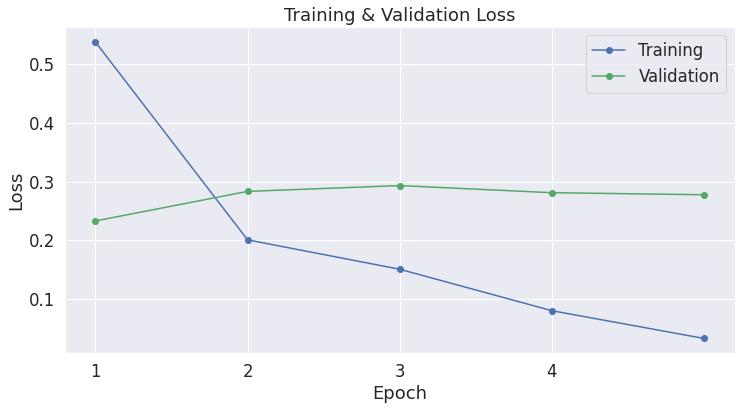

In [ ]:
import matplotlib.pyplot as plt

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
params = list(model.named_parameters())

print('The BertShared model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BertShared model has 324 different named parameters.

==== Embedding Layer ====

encoder.embeddings.word_embeddings.weight               (42000, 768)
encoder.embeddings.position_embeddings.weight             (512, 768)

==== First Transformer ====

encoder.embeddings.token_type_embeddings.weight             (2, 768)
encoder.embeddings.LayerNorm.weight                           (768,)
encoder.embeddings.LayerNorm.bias                             (768,)
encoder.encoder.layer.0.attention.self.query.weight       (768, 768)
encoder.encoder.layer.0.attention.self.query.bias             (768,)
encoder.encoder.layer.0.attention.self.key.weight         (768, 768)
encoder.encoder.layer.0.attention.self.key.bias               (768,)
encoder.encoder.layer.0.attention.self.value.weight       (768, 768)
encoder.encoder.layer.0.attention.self.value.bias             (768,)
encoder.encoder.layer.0.attention.output.dense.weight     (768, 768)
encoder.encoder.layer.0.attention.output.dense.bias      

In [ ]:
# 모델 저장
output_dir='/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save'
# output_dir='/content/drive/MyDrive/KUBIG Project/KUBIG 2021-2 NLP/hip_model_save'

# 디렉토리 만들기
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# 모델, 토크나이저 등 저장
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to /content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save


('/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/tokenizer_config.json',
 '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/special_tokens_map.json',
 '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/vocab.txt',
 '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/added_tokens.json',
 '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/tokenizer.json')

In [ ]:
!ls -l --block-size=K '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save'
# !ls -l --block-size=K '/content/drive/MyDrive/KUBIG Project/KUBIG 2021-2 NLP/hip_model_save'

total 576565K
-rw------- 1 root root      5K Oct 12 05:13 config.json
-rw------- 1 root root 575567K Oct 12 05:13 pytorch_model.bin
-rw------- 1 root root      1K Oct 12 05:13 special_tokens_map.json
-rw------- 1 root root      1K Oct 12 05:13 tokenizer_config.json
-rw------- 1 root root    656K Oct 12 05:13 tokenizer.json
-rw------- 1 root root    337K Oct 12 05:13 vocab.txt


In [ ]:
!ls -l --block-size=M '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/pytorch_model.bin'

-rw------- 1 root root 563M Oct 12 05:13 '/content/drive/Shareddrives/KLUE Summarization/klue_sum_model_save/pytorch_model.bin'


# Reference

* [Hugging Face Tokenizer](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer) : 

* [Fine-tuning a pretrained model](https://huggingface.co/transformers/training.html)

* [LMKor : kykim/bertshared-kor-base](https://github.com/kiyoungkim1/LMkor)

* [Leveraging Pre-trained Checkpoints for Sequence Generation Tasks](https://arxiv.org/pdf/1907.12461.pdf)

* [가사생성](https://github.com/honghyeong/NLP_Creators/blob/main/code/fine-tuning/Indie_fine_tuning.ipynb)

* [사용법](https://github.com/kiyoungkim1/LMkor/blob/main/examples/bertshared_summarization.py)

* https://github.com/kiyoungkim1/LMkor/blob/main/examples/bertshared_summarization.py

* https://huggingface.co/transformers/model_doc/encoderdecoder.html

* https://huggingface.co/kykim/gpt3-kor-small_based_on_gpt2/blob/main/config.json

* https://huggingface.co/kykim/bertshared-kor-base/blob/main/config.json

- https://huggingface.co/transformers/model_doc/gpt2.html#gpt2lmheadmodel

- https://huggingface.co/transformers/model_doc/encoderdecoder.html